# Задание 1
Поиск локальных экстремумов функции двух переменных

Написать следующие функции: 

Формат входных данных:  

а) Список названий переменных ; 

б) Функция в аналитическом виде; 

в) Список ограничений функции (по умолчанию ограничений нет) 

    

Формат выходных данных: 

а) Список координат, для всех точек локальных экстремумов, сц указанием типа экстремума (минимум, максимум, седловая точка, требуется дополнительное исследование. 

б) 3-D график функции с отмеченными точками локальных экстремумов.  

In [ ]:
from sympy import *
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def check_x_y(c,ogr_x,ogr_y):
  '''
  Функция проверки полученных экстремумов на вхождение в интервал ограничений
  с - список полученных решений
  ogr_x - интервал ограничений для х
  ogr_y - интервал ограничений для y
  '''
  c_new=[]
  x=list(c[0].keys())[0]
  y=list(c[0].keys())[1]
  if ogr_x is not None and ogr_y is None:
    ogr_x=ogr_x.replace('(','').replace(')','')
    ogr_x=ogr_x.split(',')
    x_min=float(ogr_x[0])
    x_max=float(ogr_x[1])
    for g in c:
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if g[x]>x_min and g[x]<x_max:
          c_new.append(g)
  if ogr_y is not None and ogr_x is None:
    ogr_y=ogr_y.replace('(','').replace(')','')
    ogr_y=ogr_y.split(',')
    y_min=float(ogr_y[0])
    y_max=float(ogr_y[1])
    for g in c:
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if g[y]>y_min and g[y]<y_max:
          c_new.append(g)
  if ogr_y is not None and ogr_x is not None :
    ogr_y=ogr_y.replace('(','').replace(')','')
    ogr_y=ogr_y.split(',')
    y_min=float(ogr_y[0])
    y_max=float(ogr_y[1])
    ogr_x=ogr_x.replace('(','').replace(')','')
    ogr_x=ogr_x.split(',')
    x_min=float(ogr_x[0])
    x_max=float(ogr_x[1])
    for g in c:
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if g[y]>y_min and g[y]<y_max and g[x]>x_min and g[x]<x_max:
          c_new.append(g)
  if ogr_y is None and ogr_x is None:
      c_new=c
  return c_new

In [ ]:
def extr(name_of_var,f,ogr_x=None,ogr_y=None):
  '''
  Функция нахождения экстремумов
  name_of_var - названия переменных
  f - функция в виде строкового типа
  ogr_x - интервал ограничений для х
  ogr_y - интервал ограничений для y
  '''
  x,y=symbols(name_of_var)
  f=parsing.sympy_parser.parse_expr(f)
  dfdx=diff(f,x)
  dfdy=diff(f,y)
  c=solve([dfdx,dfdy])
  c_=[]
  if type(c)!=list:
    c_.append(c)
    c=c_
  s_min=[]
  s_max=[]
  s_saddle=[]
  if c!=[]:
    dfdxx=diff(dfdx,x)
    dfdyy=diff(dfdy,y)
    dfdxy=diff(dfdx,y)
    c_new=check_x_y(c,ogr_x,ogr_y)
    print('Программа выводит только действительные решения!')
    for g in c_new:
      A=dfdxx.subs([(x,g[x]),(y,g[y])])
      B=dfdxy.subs([(x,g[x]),(y,g[y])])
      C=dfdyy.subs([(x,g[x]),(y,g[y])])
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if A*C-B**2>0 and A>0:
            s_min.append(g)
            print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}',' функция имеет локальный минимум равный',f.subs([(x,g[x]),(y,g[y])]),'=',f'{float(f.subs([(x,g[x]),(y,g[y])])):.3f}')
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if A*C-B**2>0 and A<0:
            s_max.append(g)
            print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}',' функция имеет локальный максимум равный',f.subs([(x,g[x]),(y,g[y])]),'=',f'{float(f.subs([(x,g[x]),(y,g[y])])):.3f}')
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if A*C-B**2<0 or  A*C-B**2==0:
            s_saddle.append(g)
            print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}','функция не обладает экстремумом, то есть седловая точка')
  else:
    print('Решения нет')
  return s_min,s_max,s_saddle

In [ ]:
def f_input():
  '''
  Функция для вводы данных
  '''
  name_of_var=input('Введите названия переменных. Пример: x y. Ввод:')
  f=input('Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:')
  ogr=input('Есть ли ограничения ? 1-да/ 0 – нет. Ввод:')
  if int(ogr)==1:
    ogr_x=input('Введите допустимые интервалы по x в виде интервала. Пример: (-1,1). Ввод:')
    ogr_y=input('Введите ограничения по y в виде интервала. Пример: (-1,1). Ввод:')
  else:
    ogr_x=None
    ogr_y=None
  return [name_of_var,f,ogr_x,ogr_y]

In [ ]:
def f_new(f,x1,y1):
  '''
  Функция для создания массива Z  с помощью подсчета значения функции в точках
  f - функция в строковом формате
  x1 - массив значений х
  y1 - массив значений y
  '''
  s=[]
  for i in range(len(x1)):
    k=[]
    for j in range(len(x1[i])):
      x=x1[i][j]
      y=y1[i][j]
      z=eval(f)
      k.append(float(z))
    s.append(k)
  return np.array(s)

In [ ]:
def graph(f,d):
  '''
  Функция построения графика и экстремумов
  f - функция в строковом формате
  d - список полученных экстремумов и седловых точек
  '''
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  k=0
  colors=['green','red','yellow']
  names=['Точка локального минимума','Точка локального максимума','Седловая точка']
  f1=parsing.sympy_parser.parse_expr(f)
  x_max=5
  x_min=-5
  y_max=5
  y_min=-5
  for h in d:
    for q in h:
      x=list(q.keys())[0]
      y=list(q.keys())[1]
      z=float(f1.subs([(x,q[x]),(y,q[y])]))
      ax.scatter3D(float(q[x]),float(q[y]),z,s=200,color=colors[k],label=names[k])
      x_max=max(float(q[x]),x_max)
      y_max=max(float(q[y]),y_max)
      x_min=min(float(q[x]),x_min)
      y_min=min(float(q[y]),y_min)
    k+=1
  x1 = np.linspace(x_min-0.1, x_max+0.1, 100) 
  y1 = np.linspace(y_min-0.1, y_max+0.1, 100) 
  X, Y = np.meshgrid(x1, y1)
  Z = f_new(f,X, Y)
  fig.set_figwidth(15)   
  fig.set_figheight(12)
  surf=ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='BuPu')
  fig.colorbar(surf, shrink=0.5, aspect=5)
  s='График функции '+str(f)
  plt.title(s)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  ax.legend()
  plt.show()

In [ ]:
def all_f():
  '''
  Функция, объединяющая все функции выше
  '''
  s=f_input()
  d=extr(*s)
  graph(s[1],d)

In [ ]:
all_f()

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:20 + (x ** 2 - 10 * cos(2 * pi * x)) + (y ** 2 - 10 * cos(2 * pi * y))
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:1
Введите допустимые интервалы по x в виде интервала. Пример: (-1,1). Ввод:-5.12 5.12
Введите ограничения по y в виде интервала. Пример: (-1,1). Ввод:-5.12 5.12


NotImplementedError: ignored

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:(1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:0
Программа выводит только действительные решения!
В точке x = 0.0 = 0.000 y = 1.00000000000000 = 1.000 функция не обладает экстремумом, то есть седловая точка
В точке x = 0.100537937324158 = 0.101 y = -2.64451358502312 = -2.645 функция не обладает экстремумом, то есть седловая точка
В точке x = 3.00000000000000 = 3.000 y = 0.500000000000000 = 0.500  функция имеет локальный минимум равный 5.54667823983524e-32 = 0.000


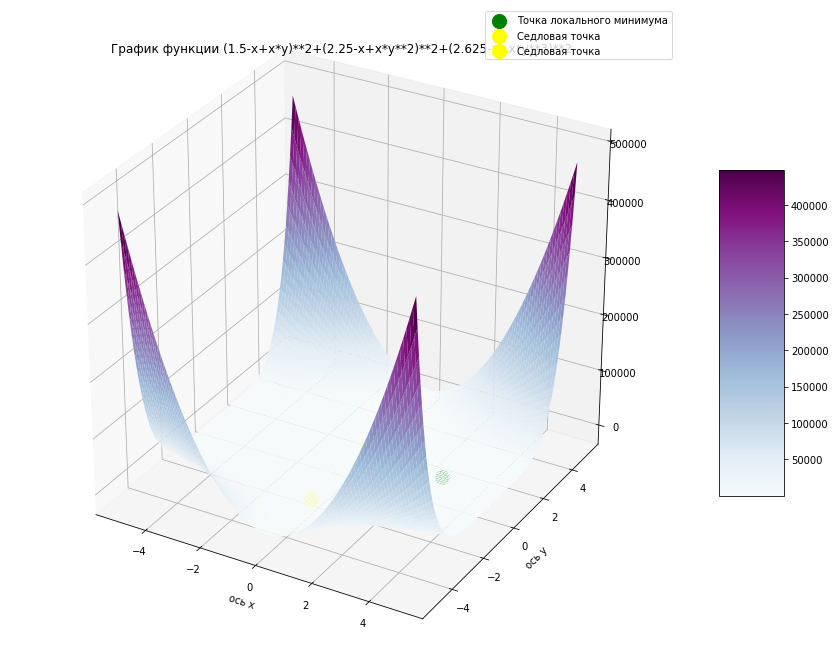

In [ ]:
all_f()#функция Била

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:(x+2*y-7)**2+(2*x+y-5)**2
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:0
Программа выводит только действительные решения!
В точке x = 1 = 1.000 y = 3 = 3.000  функция имеет локальный минимум равный 0 = 0.000


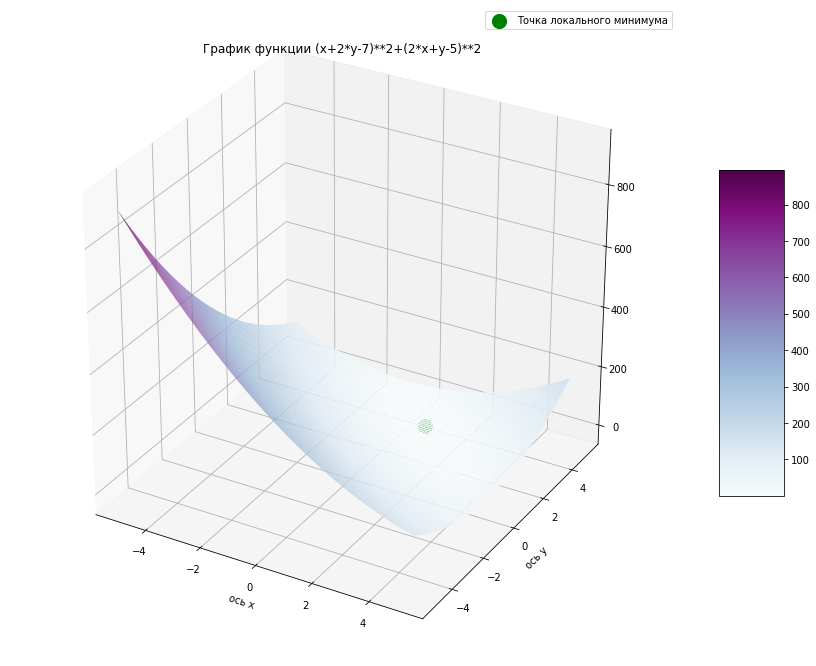

In [ ]:
all_f()#функция бута

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:0.26*(x**2+y**2)-0.48*x*y
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:0
Программа выводит только действительные решения!
В точке x = 0.0 = 0.000 y = 0.0 = 0.000  функция имеет локальный минимум равный 0 = 0.000


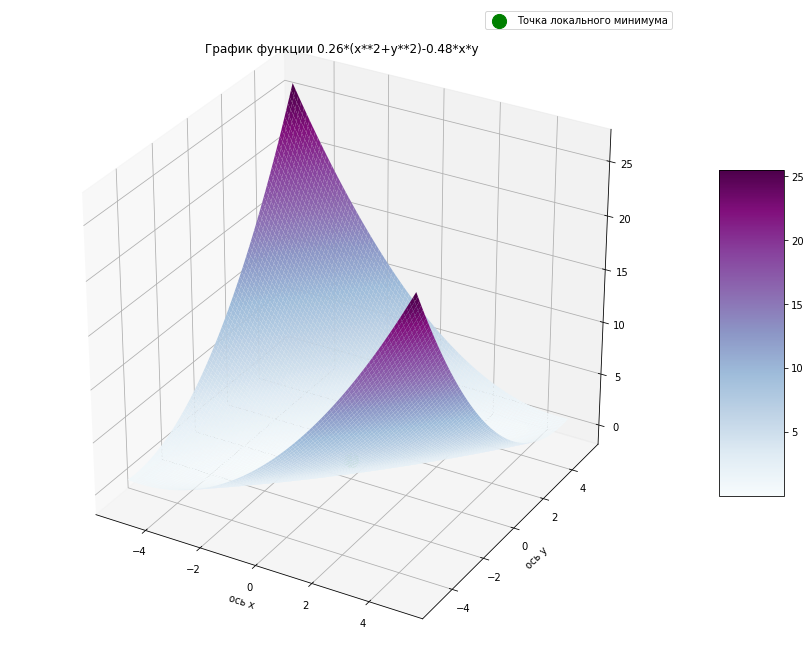

In [ ]:
all_f()#функция матьяса

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:2*x**2-1.05*x**4+x**6/6+x*y+y**2
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:0
Программа выводит только действительные решения!
В точке x = -1.74755234583029 = -1.748 y = 0.873776172915144 = 0.874  функция имеет локальный минимум равный 0.298638442236859 = 0.299
В точке x = -1.07054229182366 = -1.071 y = 0.535271145911830 = 0.535 функция не обладает экстремумом, то есть седловая точка
В точке x = 0.0 = 0.000 y = 0.0 = 0.000  функция имеет локальный минимум равный 0 = 0.000
В точке x = 1.07054229182366 = 1.071 y = -0.535271145911830 = -0.535 функция не обладает экстремумом, то есть седловая точка
В точке x = 1.74755234583029 = 1.748 y = -0.873776172915144 = -0.874  функция имеет локальный минимум равный 0.298638442236859 = 0.299


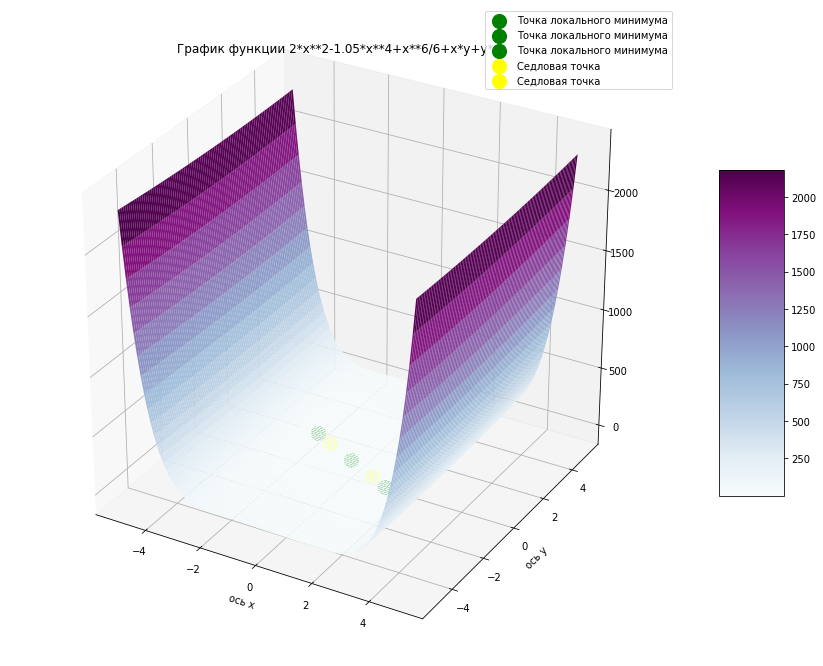

In [ ]:
all_f()#функция трехгорбого верблюда

# Задание 2

Поиск локальных экстремумов функции двух переменных с ограничениями (метод Лагранжа);

Формат входных данных:

а) Список названий переменных ;

б) Функция в аналитическом виде;

в) Список ограничений функции (по умолчанию ограничений нет)

г) Ограничивающая функция.

Формат выходных данных:

а) Список координат, для всех точек локальных экстремумов, с указанием типа экстремума (минимум, максимум, седловая точка, требуется дополнительное исследование.

б) 3-D график функции с отмеченными точками локальных экстремумов.

In [ ]:
def extr_with_limit(name_of_var,f,f_limit,ogr_x=None,ogr_y=None):
  '''
  Функция нахождения экстремумов
  name_of_var - названия переменных
  f - функция в виде строкового типа
  f_limit - ограничевающая функция в виде строкового типа
  ogr_x - интервал ограничений для х
  ogr_y - интервал ограничений для y
  '''
  x,y=symbols(name_of_var)
  f=parsing.sympy_parser.parse_expr(f)
  f_limit=parsing.sympy_parser.parse_expr(f_limit)
  lambda_=Symbol('Lambda')
  f_L=f+lambda_*f_limit
  s_min=[]
  s_max=[]
  s_saddle=[]
  dfdx=diff(f_L,x)
  dfdy=diff(f_L,y)
  dfdl=diff(f_L,lambda_)
  c=solve([dfdx,dfdy,dfdl],[x,y,lambda_],dict=True)
  c_=[]
  if type(c)!=list:
    c_.append(c)
    c=c_
  if c!=[]:
    dfdxx=diff(dfdx,x)
    dfdyy=diff(dfdy,y)
    dfdxy=diff(dfdx,y)
    dfldx=diff(f_limit,x)
    dfldy=diff(f_limit,y)
    c_new=check_x_y(c,None,None)
    print('Программа выводит только действительные решения!')
    for g in c_new:
      A=float(dfdxx.subs([(x,g[x]),(y,g[y]),(lambda_,g[lambda_])]))
      B=float(dfdxy.subs([(x,g[x]),(y,g[y]),(lambda_,g[lambda_])]))
      C=float(dfdyy.subs([(x,g[x]),(y,g[y]),(lambda_,g[lambda_])]))
      D=float(dfldx.subs([(x,g[x]),(y,g[y])]))
      E=float(dfldy.subs([(x,g[x]),(y,g[y])]))
      H=np.array([[0,D,E],
                [D,A,B],
                [E,B,C]])
      H_count=np.linalg.det(H)
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if H_count<0:
          s_min.append(g)
          print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}',' функция имеет локальный минимум равный',f.subs([(x,g[x]),(y,g[y])]),'=',f'{float(f.subs([(x,g[x]),(y,g[y])])):.3f}')
      if sympify(g[y]).is_real and sympify(g[x]).is_real:  
        if H_count>0:
          s_max.append(g)
          print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}',' функция имеет локальный максимум равный',f.subs([(x,g[x]),(y,g[y])]),'=',f'{float(f.subs([(x,g[x]),(y,g[y])])):.3f}')
      if sympify(g[y]).is_real and sympify(g[x]).is_real:
        if H_count==0:
          s_saddle.append(g)
          print('В точке x =',g[x],'=',f'{float(g[x]):.3f}','y =',g[y],'=',f'{float(g[y]):.3f}','функция не обладает экстремумом')
  else:
    print('Решения нет')
  return s_min,s_max,s_saddle

In [ ]:
def f_input_with_limit():
  '''
  Функция ввода данных с ограничевающей функцией
  '''
  name_of_var=input('Введите названия переменных. Пример: x y. Ввод:')
  f=input('Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:')
  f_limit=input('Введите ограничивающую функцию z=f(x,y)=0. Пример: x**2+y**2-1. Ввод:')
  ogr=input('Есть ли ограничения ? 1-да/ 0 – нет. Ввод:')
  if int(ogr)==1:
    ogr_x=input('Введите допустимые интервалы по x в виде интервала. Пример: (-1,1). Ввод:')
    ogr_y=input('Введите ограничения по y в виде интервала. Пример: (-1,1). Ввод:')
  else:
    ogr_x=None
    ogr_y=None
  return [name_of_var,f,f_limit,ogr_x,ogr_y]

In [ ]:
def f_new(f,x1,y1):
  '''
  Функция для создания массива Z  с помощью подсчета значения функции в точках
  f - функция в строковом формате
  x1 - массив значений х
  y1 - массив значений y
  '''
  s=[]
  for i in range(len(x1)):
    k=[]
    for j in range(len(x1[i])):
      x=x1[i][j]
      y=y1[i][j]
      z=eval(f)
      k.append(float(z))
    s.append(k)
  return np.array(s)

In [ ]:
def graph_with_limit(f,d):
  '''
  Функция построения графика и экстремумов
  f - функция в строковом формате
  d - список полученных экстремумов и седловых точек
  '''
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  k=0
  colors=['green','red','yellow']
  names=['Точка локального минимума','Точка локального максимума','Седловая точка']
  f1=parsing.sympy_parser.parse_expr(f)
  x_max=5
  x_min=-5
  y_max=5
  y_min=-5
  for h in d:
    for q in h:
      x=list(q.keys())[0]
      y=list(q.keys())[1]
      z=float(f1.subs([(x,q[x]),(y,q[y])]))
      ax.scatter3D(float(q[x]),float(q[y]),z,s=200,color=colors[k],label=names[k])
      x_max=max(float(q[x]),x_max)
      y_max=max(float(q[y]),y_max)
      x_min=min(float(q[x]),x_min)
      y_min=min(float(q[y]),y_min)
    k+=1
  x1 = np.linspace(x_min-0.1, x_max+0.1, 100) 
  y1 = np.linspace(y_min-0.1, y_max+0.1, 100) 
  X, Y = np.meshgrid(x1, y1)
  Z = f_new(f,X, Y)
  fig.set_figwidth(15)   
  fig.set_figheight(12)
  surf=ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='BuPu')
  fig.colorbar(surf, shrink=0.5, aspect=5)
  s='График функции '+str(f)
  plt.title(s)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  ax.legend()
  plt.show()

In [ ]:
def all_f_with_limit():
  '''
  Функция, объединяющая все функции выше
  '''
  s=f_input_with_limit()
  d=extr_with_limit(*s)
  graph_with_limit(s[1],d)

Введите названия переменных. Пример: x y. Ввод:x y
Введите функцию z=f(x,y). Пример: x**2+sin(y). Ввод:(1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
Введите ограничивающую функцию z=f(x,y)=0. Пример: x**2+y**2-1. Ввод:x+y-3.5
Есть ли ограничения ? 1-да/ 0 – нет. Ввод:0
Программа выводит только действительные решения!
В точке x = 3.00000000000000 = 3.000 y = 0.500000000000000 = 0.500  функция имеет локальный минимум равный 5.54667823983524e-32 = 0.000


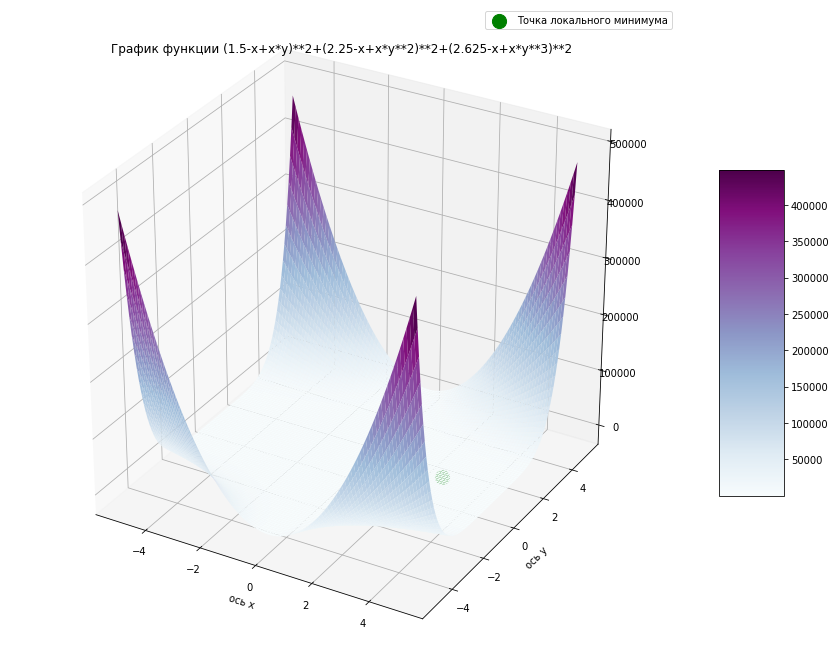

In [ ]:
all_f_with_limit()